In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [5]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [6]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [7]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [8]:
model = SVC(kernel='linear' ,C=20, gamma='auto')

In [9]:
model.fit(trainX,trainY)

SVC(C=20, gamma='auto', kernel='linear')

In [10]:
ypred = model.predict(trainX) 

In [11]:
c=accuracy_score(trainY,ypred)*100
c

94.609375

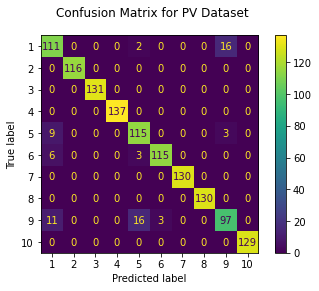

In [12]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [13]:
ypred1 = model.predict(testX) 

In [14]:
c1=accuracy_score(testY,ypred1)*100
c1

94.375

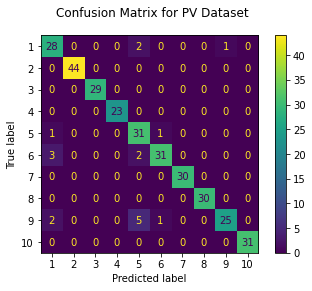

In [15]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [16]:
YR=np.concatenate((trainY,testY),axis=0)

In [18]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [19]:
ac2=accuracy_score(YR,YP)*100
ac2

94.5625

In [20]:
c2=confusion_matrix(YR,YP)
c2

array([[139,   0,   0,   0,   4,   0,   0,   0,  17,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 160,   0,   0,   0,   0,   0,   0],
       [ 10,   0,   0,   0, 146,   1,   0,   0,   3,   0],
       [  9,   0,   0,   0,   5, 146,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 160,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [ 13,   0,   0,   0,  21,   4,   0,   0, 122,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 160]], dtype=int64)